# Machine Learning Assignment 3
###  Prepared by Sujil Kumar K.M (D00242726)
##### Trump Approval Ratings

In [117]:
import pandas as pd
import numpy as np
import os
df = pd.read_csv('E:\\Mchine_Learning\\temp_repo_for_ml_reflection\\approval_topline.csv')
df.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,1/20/2021,39.41,45.87,32.95,56.71,62.47,50.95,11:52:51 20 Jan 2021
1,Donald Trump,Adults,1/20/2021,36.95,42.81,31.09,59.62,65.47,53.76,11:49:36 20 Jan 2021
2,Donald Trump,All polls,1/20/2021,38.62,44.94,32.30,57.85,63.68,52.02,11:47:59 20 Jan 2021
3,Donald Trump,All polls,1/19/2021,39.16,45.18,33.14,57.43,62.94,51.92,22:36:53 19 Jan 2021
4,Donald Trump,Adults,1/19/2021,38.05,43.54,32.56,59.08,64.49,53.67,22:38:31 19 Jan 2021


This data contains a trendline for the approval ratings for former US President Donald Trump

In [118]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   president            4377 non-null   object 
 1   subgroup             4377 non-null   object 
 2   modeldate            4377 non-null   object 
 3   approve_estimate     4377 non-null   float64
 4   approve_hi           4377 non-null   float64
 5   approve_lo           4377 non-null   float64
 6   disapprove_estimate  4377 non-null   float64
 7   disapprove_hi        4377 non-null   float64
 8   disapprove_lo        4377 non-null   float64
 9   timestamp            4377 non-null   object 
dtypes: float64(6), object(4)
memory usage: 342.1+ KB
None


In [119]:
# checking columns names
df.columns

Index(['president', 'subgroup', 'modeldate', 'approve_estimate', 'approve_hi',
       'approve_lo', 'disapprove_estimate', 'disapprove_hi', 'disapprove_lo',
       'timestamp'],
      dtype='object')

In [120]:
# Quick Glance
Glance=10
view=df.head(Glance)
print(view)


      president   subgroup  modeldate  approve_estimate  approve_hi  \
0  Donald Trump     Voters  1/20/2021             39.41       45.87   
1  Donald Trump     Adults  1/20/2021             36.95       42.81   
2  Donald Trump  All polls  1/20/2021             38.62       44.94   
3  Donald Trump  All polls  1/19/2021             39.16       45.18   
4  Donald Trump     Adults  1/19/2021             38.05       43.54   
5  Donald Trump     Voters  1/19/2021             40.15       45.83   
6  Donald Trump     Adults  1/18/2021             36.15       41.19   
7  Donald Trump     Voters  1/18/2021             39.77       45.41   
8  Donald Trump  All polls  1/18/2021             38.26       44.22   
9  Donald Trump     Voters  1/17/2021             40.24       45.61   

   approve_lo  disapprove_estimate  disapprove_hi  disapprove_lo  \
0       32.95                56.71          62.47          50.95   
1       31.09                59.62          65.47          53.76   
2       32.30 

In [121]:
# deleting duplicates
df.drop_duplicates(keep='first',inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4377 entries, 0 to 4376
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   president            4377 non-null   object 
 1   subgroup             4377 non-null   object 
 2   modeldate            4377 non-null   object 
 3   approve_estimate     4377 non-null   float64
 4   approve_hi           4377 non-null   float64
 5   approve_lo           4377 non-null   float64
 6   disapprove_estimate  4377 non-null   float64
 7   disapprove_hi        4377 non-null   float64
 8   disapprove_lo        4377 non-null   float64
 9   timestamp            4377 non-null   object 
dtypes: float64(6), object(4)
memory usage: 376.1+ KB
None


In [122]:
df['president'].unique()

array(['Donald Trump'], dtype=object)

In [123]:
df = df.drop(columns=['president','timestamp'])
# df.drop(columns=['president'])

In [124]:
# renaming feature name
df.rename( {'predicted_probability':'pred_prob' } , axis=1 , inplace = True)

In [125]:
df.columns

Index(['subgroup', 'modeldate', 'approve_estimate', 'approve_hi', 'approve_lo',
       'disapprove_estimate', 'disapprove_hi', 'disapprove_lo'],
      dtype='object')

Column names are seems to be meaningful and suitable, I am not changing any names.

In [126]:
# describing the dataset

description=df.describe()
description

,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo
count,4377.00,4377.00,4377.00,4377.00,4377.00,4377.00
mean,41.46,45.75,37.18,53.49,57.85,49.13
std,2.01,2.20,1.95,1.96,2.00,2.03
min,34.93,38.82,31.04,37.00,43.29,30.71
25%,40.31,44.31,36.12,52.54,56.75,48.30
50%,41.62,46.01,37.44,53.39,57.70,49.14
75%,42.86,47.24,38.52,54.54,58.99,50.20
max,48.62,53.80,43.43,60.59,65.84,55.33


In [127]:
# limiting the results upto two possible digits after decimals 
pd.set_option('precision', 2)
description_wth_precesion=df.describe()
description_wth_precesion

,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo
count,4377.00,4377.00,4377.00,4377.00,4377.00,4377.00
mean,41.46,45.75,37.18,53.49,57.85,49.13
std,2.01,2.20,1.95,1.96,2.00,2.03
min,34.93,38.82,31.04,37.00,43.29,30.71
25%,40.31,44.31,36.12,52.54,56.75,48.30
50%,41.62,46.01,37.44,53.39,57.70,49.14
75%,42.86,47.24,38.52,54.54,58.99,50.20
max,48.62,53.80,43.43,60.59,65.84,55.33


In [128]:
types=df.dtypes
print(types)

subgroup                object
modeldate               object
approve_estimate       float64
approve_hi             float64
approve_lo             float64
disapprove_estimate    float64
disapprove_hi          float64
disapprove_lo          float64
dtype: object


In [129]:
df.head()

,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo
0,Voters,1/20/2021,39.41,45.87,32.95,56.71,62.47,50.95
1,Adults,1/20/2021,36.95,42.81,31.09,59.62,65.47,53.76
2,All polls,1/20/2021,38.62,44.94,32.30,57.85,63.68,52.02
3,All polls,1/19/2021,39.16,45.18,33.14,57.43,62.94,51.92
4,Adults,1/19/2021,38.05,43.54,32.56,59.08,64.49,53.67


Data types seems to be ok , no need to make any changes

In [130]:
### Dicussion regarding the balancing of data set

In [131]:
'''
Correlations between Attributes 
#######################################################################################################
Explain postive and negative Correlations

'''

'\nCorrelations between Attributes \n#######################################################################################################\nExplain postive and negative Correlations\n\n'

In [132]:
# looking for null values
df.isnull().sum()

subgroup               0
modeldate              0
approve_estimate       0
approve_hi             0
approve_lo             0
disapprove_estimate    0
disapprove_hi          0
disapprove_lo          0
dtype: int64

In [133]:
# checking number of rows in the dataframe
df.shape[0]

4377

We do not need this much data for analysis, keeping the size of data between n*100 to n*1000 for balance

In [134]:
# taking the first 15k records for the analysis
df = df[:15000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4377 entries, 0 to 4376
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subgroup             4377 non-null   object 
 1   modeldate            4377 non-null   object 
 2   approve_estimate     4377 non-null   float64
 3   approve_hi           4377 non-null   float64
 4   approve_lo           4377 non-null   float64
 5   disapprove_estimate  4377 non-null   float64
 6   disapprove_hi        4377 non-null   float64
 7   disapprove_lo        4377 non-null   float64
dtypes: float64(6), object(2)
memory usage: 307.8+ KB


In [135]:
# df['_medpoly2'].isnull().sum()

I have noticed around 3700 columnd are empty in distric column, it 24% of total number of columns, I am not going to change anything in these feilds at the moment.

In [136]:
Correlations=df.corr()
Correlations

,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo
approve_estimate,1.00,0.97,0.96,-0.82,-0.84,-0.75
approve_hi,0.97,1.00,0.88,-0.80,-0.80,-0.76
approve_lo,0.96,0.88,1.00,-0.78,-0.82,-0.70
disapprove_estimate,-0.82,-0.80,-0.78,1.00,0.97,0.97
disapprove_hi,-0.84,-0.80,-0.82,0.97,1.00,0.89
disapprove_lo,-0.75,-0.76,-0.70,0.97,0.89,1.00


In [137]:
# Skew to identify the nature of the data.
'''Skew refer to distribution that is assumed to be Gaussian (Normal or Bell Curve)
It could be shifted or squashed in one directions or another 
Machine learning assume to have a gaussian distribution'''
skew_data=df.skew()
print(skew_data)

approve_estimate      -0.40
approve_hi            -0.29
approve_lo            -0.49
disapprove_estimate   -1.44
disapprove_hi         -0.85
disapprove_lo         -1.83
dtype: float64


### Data Visualization

In [138]:
from matplotlib import pyplot

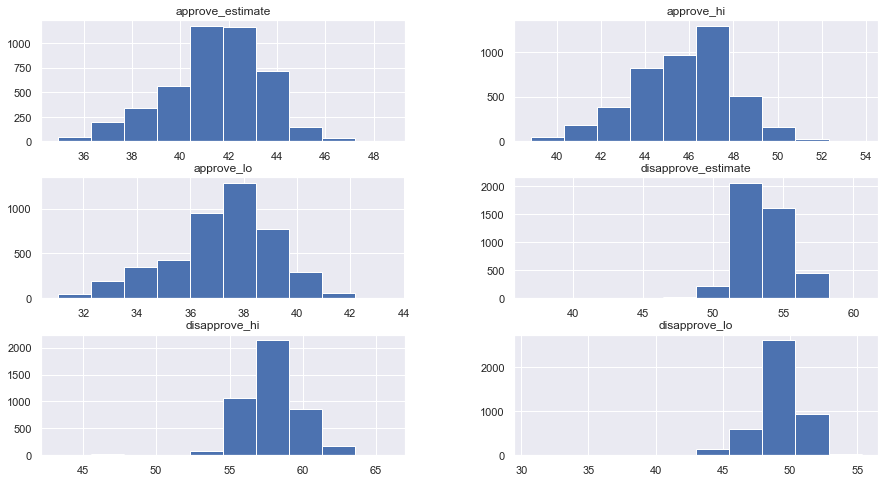

'\nHelps us understand the data is skew, Gaussian and exponential distribution \nAlso help us to see the possible outliner'

In [139]:
histogram=df.hist()
layout = 3,2
pyplot.show()
'''
Helps us understand the data is skew, Gaussian and exponential distribution 
Also help us to see the possible outliner'''

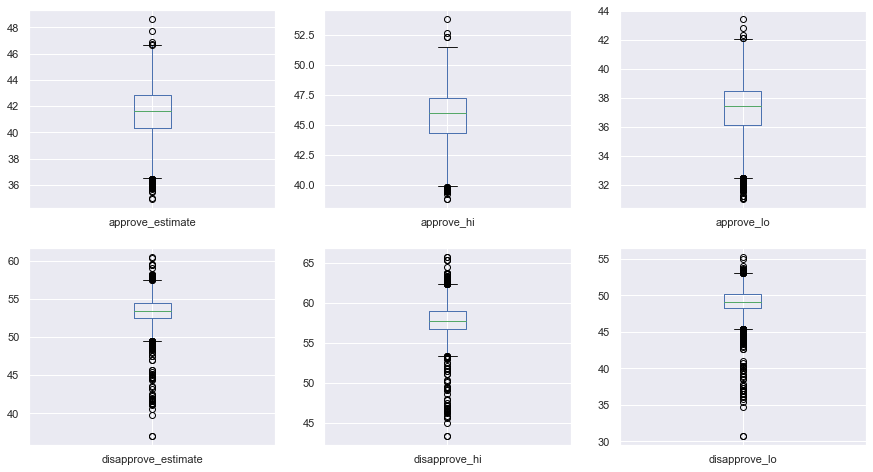

In [140]:
M=df.plot(kind='box',subplots=True,layout=(2,3),sharex=False,sharey=False)
layout = 5,5

### Varying the plot with parameters

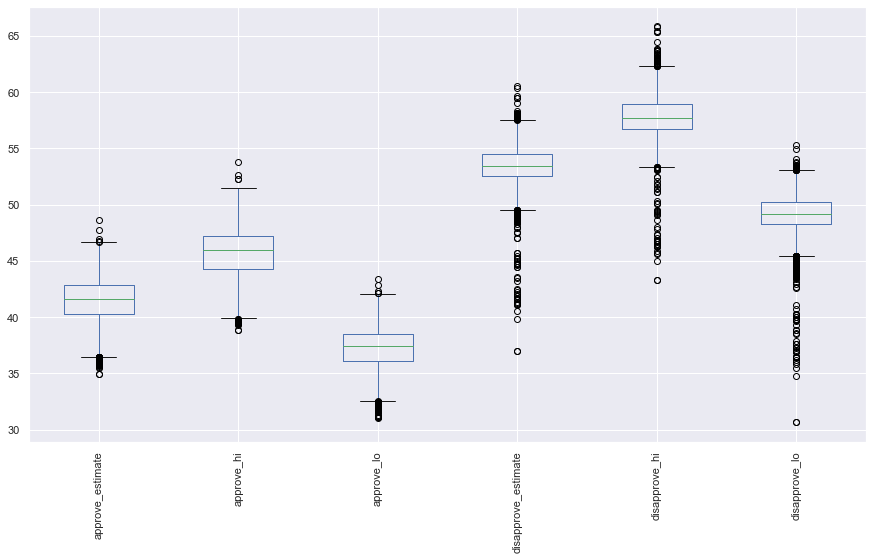

In [141]:
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=False,layout=(4,3),sharex=False,sharey=False)
layout = 5,8
plt.xticks(rotation = 90)
plt.show()

### Density Plots

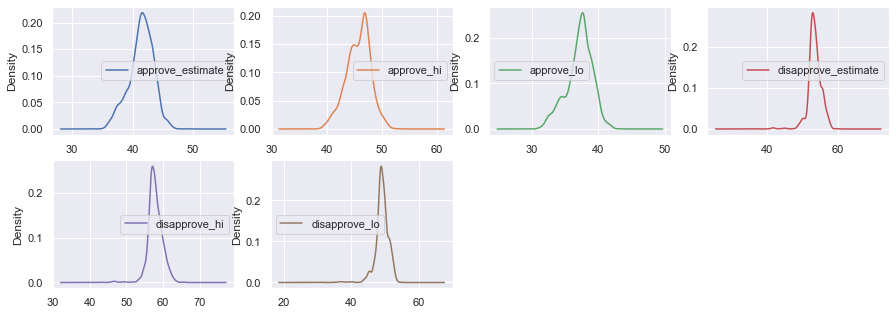

In [142]:
K=df.plot(kind='density',subplots=True,layout=(3,4),sharex=False,sharey=False)
layout = 5,8

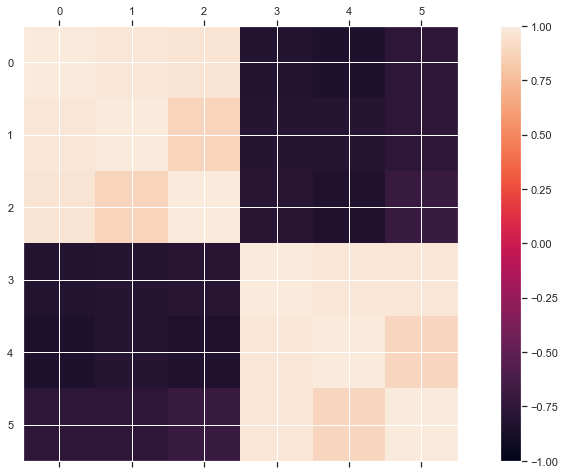

In [143]:
#Correlation Matrix

correlations = df.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
layout = 5,8
#ax.set_xlabel(col_names)
#ax.set_ylabel(col_names)
pyplot.show()

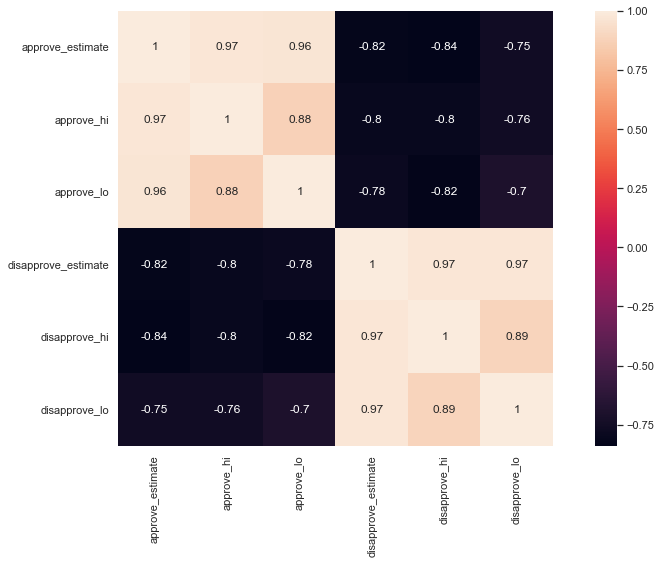

In [144]:
import seaborn as sns
corr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

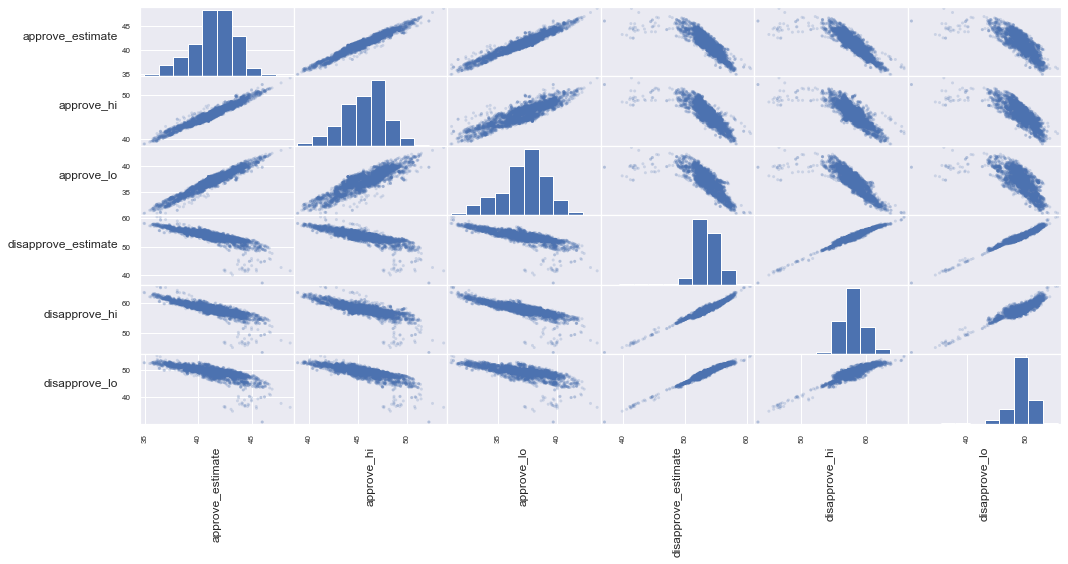

In [145]:
from pandas.plotting import scatter_matrix
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

# Graph below generated does not looks easily understandable with lot's of subplots. decided to recreate using matplotlib.

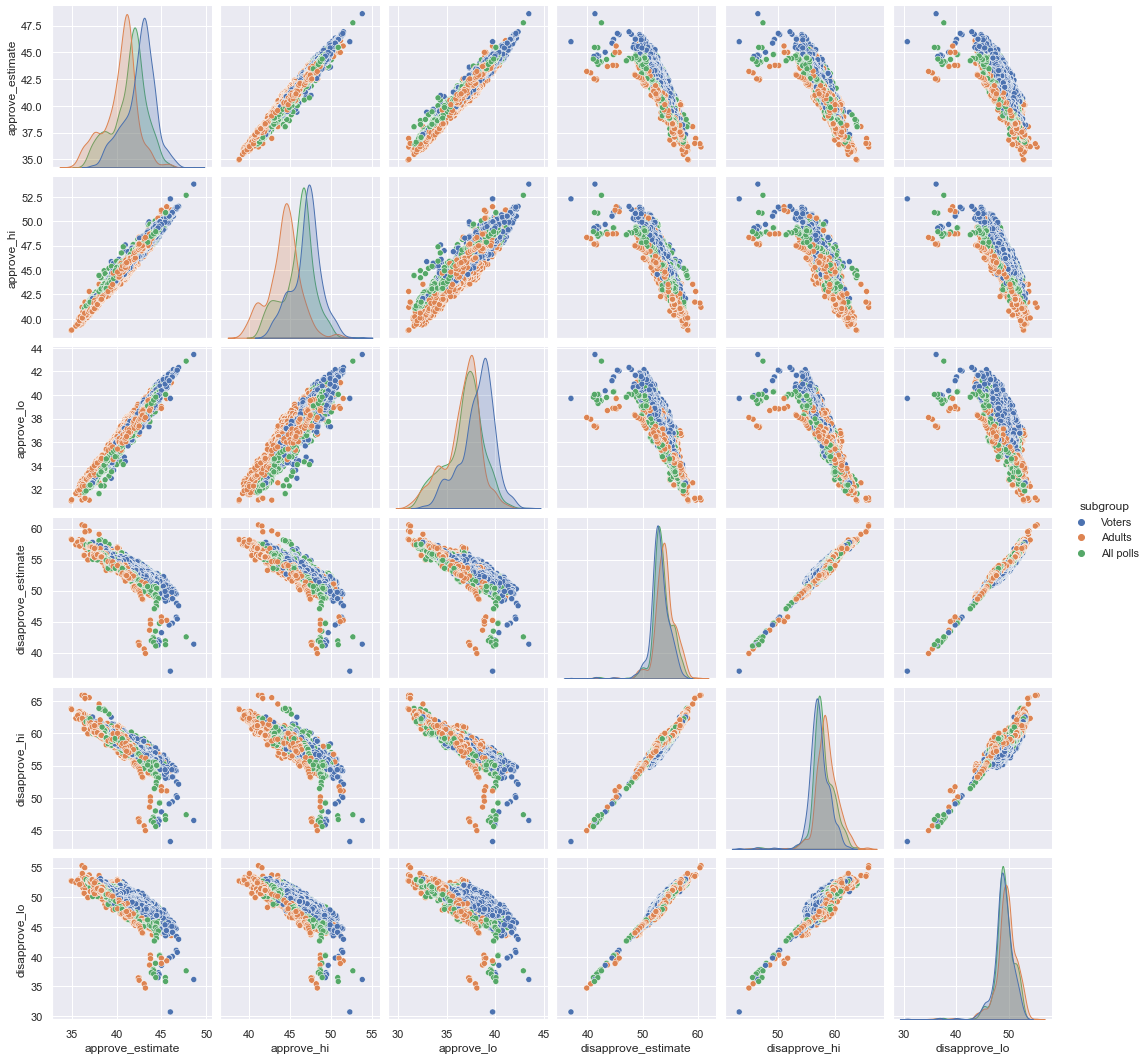

In [146]:
import seaborn as sns

# Pairplot for overlook
sns.pairplot(df,hue='subgroup')

# Principal Component Analysis(PCA)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4377 entries, 0 to 4376
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subgroup             4377 non-null   object 
 1   modeldate            4377 non-null   object 
 2   approve_estimate     4377 non-null   float64
 3   approve_hi           4377 non-null   float64
 4   approve_lo           4377 non-null   float64
 5   disapprove_estimate  4377 non-null   float64
 6   disapprove_hi        4377 non-null   float64
 7   disapprove_lo        4377 non-null   float64
dtypes: float64(6), object(2)
memory usage: 307.8+ KB


In [148]:
df = pd.get_dummies(df)
df

,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,subgroup_Adults,subgroup_All polls,subgroup_Voters,modeldate_1/1/2018,...,modeldate_9/7/2019,modeldate_9/7/2020,modeldate_9/8/2017,modeldate_9/8/2018,modeldate_9/8/2019,modeldate_9/8/2020,modeldate_9/9/2017,modeldate_9/9/2018,modeldate_9/9/2019,modeldate_9/9/2020
0,39.41,45.87,32.95,56.71,62.47,50.95,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,36.95,42.81,31.09,59.62,65.47,53.76,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38.62,44.94,32.30,57.85,63.68,52.02,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39.16,45.18,33.14,57.43,62.94,51.92,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38.05,43.54,32.56,59.08,64.49,53.67,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,46.00,52.29,39.71,37.00,43.29,30.71,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4373,45.44,50.83,40.06,41.88,47.27,36.49,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4374,45.00,51.13,38.87,45.00,51.13,38.87,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4375,46.00,52.29,39.71,37.00,43.29,30.71,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
from sklearn.decomposition import PCA

In [150]:
pca=PCA(n_components=2)

In [151]:
X_pca=pca.fit_transform(df)

In [152]:
#Varience 
# pca=PCA(.95)

In [153]:
X_pca.shape

(4377, 2)

In [154]:
pca.explained_variance_ratio_

array([0.81919329, 0.08603724])

In [155]:
pca.n_components_

2

### K-Mean Algorithm

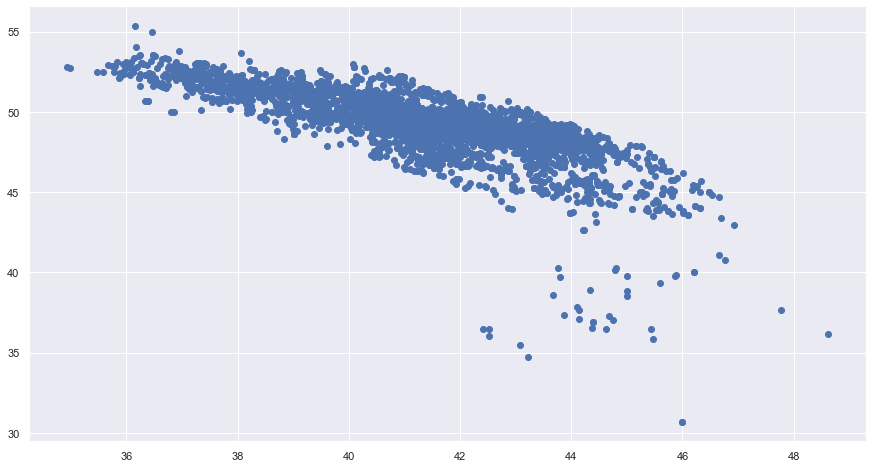

In [156]:
plt.scatter(df['approve_estimate'],df['disapprove_lo'])

In [157]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [158]:
y_predicted = km.fit_predict(df[['approve_estimate','disapprove_lo']])
y_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [159]:
df['cluster'] = y_predicted
df.tail()

,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,subgroup_Adults,subgroup_All polls,subgroup_Voters,modeldate_1/1/2018,...,modeldate_9/7/2020,modeldate_9/8/2017,modeldate_9/8/2018,modeldate_9/8/2019,modeldate_9/8/2020,modeldate_9/9/2017,modeldate_9/9/2018,modeldate_9/9/2019,modeldate_9/9/2020,cluster
4372,46.00,52.29,39.71,37.00,43.29,30.71,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4373,45.44,50.83,40.06,41.88,47.27,36.49,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4374,45.00,51.13,38.87,45.00,51.13,38.87,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4375,46.00,52.29,39.71,37.00,43.29,30.71,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4376,45.47,50.89,40.04,41.26,46.69,35.84,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
km.cluster_centers_

array([[42.69253605, 48.09946684],
       [39.50190409, 50.78538457]])

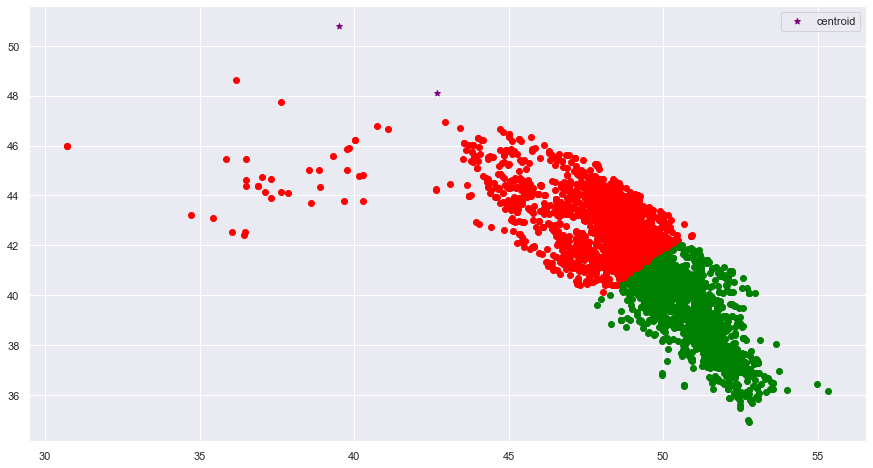

In [161]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.disapprove_lo,df1['approve_estimate'],color='red')
plt.scatter(df2.disapprove_lo,df2['approve_estimate'],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [162]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['disapprove_lo','approve_estimate']])
    sse.append(km.inertia_)

In [163]:
# sum of squared error
sse

[35713.44563863367,
 17687.09311556079,
 11422.809583288543,
 8148.189085818159,
 6122.666679352203,
 4874.914290596625,
 4214.952917376728,
 3628.5820342142138,
 3261.003907017355]

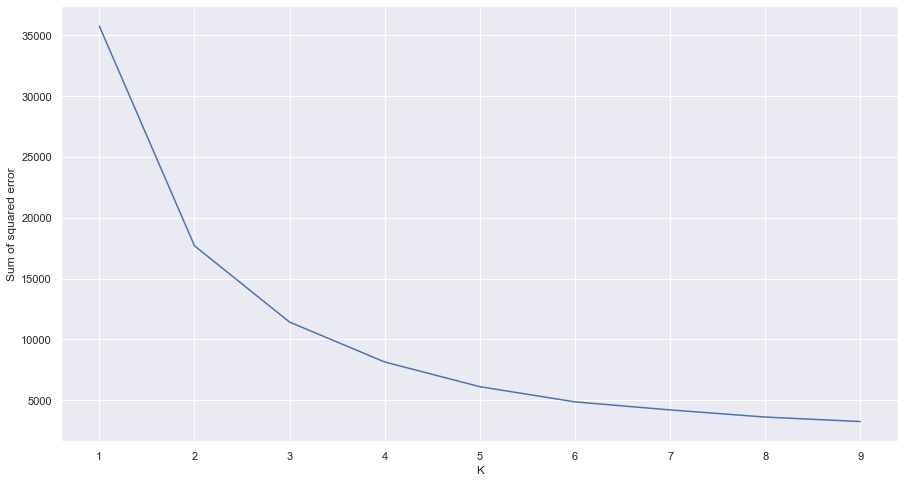

In [164]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [165]:
# scaling of the data

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df)
# scaled_f= scaler.fit_transform(df)

In [166]:
# scaled_f

In [167]:
df = df.dropna()

In [168]:
df1 = df.drop(['subgroup_Adults'], axis=1)
df1

,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,subgroup_All polls,subgroup_Voters,modeldate_1/1/2018,modeldate_1/1/2019,...,modeldate_9/7/2020,modeldate_9/8/2017,modeldate_9/8/2018,modeldate_9/8/2019,modeldate_9/8/2020,modeldate_9/9/2017,modeldate_9/9/2018,modeldate_9/9/2019,modeldate_9/9/2020,cluster
0,39.41,45.87,32.95,56.71,62.47,50.95,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,36.95,42.81,31.09,59.62,65.47,53.76,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38.62,44.94,32.30,57.85,63.68,52.02,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,39.16,45.18,33.14,57.43,62.94,51.92,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,38.05,43.54,32.56,59.08,64.49,53.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,46.00,52.29,39.71,37.00,43.29,30.71,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4373,45.44,50.83,40.06,41.88,47.27,36.49,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4374,45.00,51.13,38.87,45.00,51.13,38.87,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4375,46.00,52.29,39.71,37.00,43.29,30.71,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
df1

,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,subgroup_All polls,subgroup_Voters,modeldate_1/1/2018,modeldate_1/1/2019,...,modeldate_9/7/2020,modeldate_9/8/2017,modeldate_9/8/2018,modeldate_9/8/2019,modeldate_9/8/2020,modeldate_9/9/2017,modeldate_9/9/2018,modeldate_9/9/2019,modeldate_9/9/2020,cluster
0,39.41,45.87,32.95,56.71,62.47,50.95,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,36.95,42.81,31.09,59.62,65.47,53.76,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38.62,44.94,32.30,57.85,63.68,52.02,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,39.16,45.18,33.14,57.43,62.94,51.92,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,38.05,43.54,32.56,59.08,64.49,53.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,46.00,52.29,39.71,37.00,43.29,30.71,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4373,45.44,50.83,40.06,41.88,47.27,36.49,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4374,45.00,51.13,38.87,45.00,51.13,38.87,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4375,46.00,52.29,39.71,37.00,43.29,30.71,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
x = df1.copy()
x.drop(columns=['cluster'],inplace=True)
y = df['subgroup_Adults'].copy()

In [171]:
x = df.copy()
y = y_predicted

In [172]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [173]:

print(y)
print(x.shape)

[1 1 1 ... 0 0 0]
(4377, 1469)


In [174]:
from sklearn.model_selection import train_test_split

#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [175]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

1.0

In [176]:
y_train

array([0, 1, 0, ..., 1, 0, 0])